1. Import Library + Load Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df= pd.read_csv("DataAnalisisReal.csv")
df

,Nama,Jenis Kelamin,Olahraga Rutin,Frekuensi Olahraga,Jenis Olahraga,Frekuensi Makanan Cepat Saji,Pola Makan Seimbang,Porsi Sayur dan Buah,Jam Tidur,Kualitas Tidur,Frekuensi Tidur Larut,Unnamed: 11,Unnamed: 12
0,Ilza,Laki -Laki,Ya,1-2 Kali,Lari,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",Tidak Pernah,4-6 Jam,Tidak,Hampir setiap malam,NaN,NaN
1,Mochammad Irsyad Kurniawan,Laki -Laki,Tidak,1-2 Kali,Lari,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,6-8 Jam,Tidak,Hampir setiap malam,NaN,NaN
2,Pernando inesta,Laki -Laki,Ya,3-4 Kali,Olahraga Tim,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,4-6 Jam,Tidak,Beberapa kali dalam seminggu,NaN,NaN
3,Khesya Nazala Putri,Perempuan,Tidak,1-2 Kali,Yoga,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,6-8 Jam,Tidak,Beberapa kali dalam seminggu,NaN,NaN
4,Andhara Revalina,Perempuan,Tidak,1-2 Kali,Olahraga Tim,Beberapa kali seminggu,"Ya, Seimbang",1-2 Porsi,6-8 Jam,Ya,Beberapa kali dalam seminggu,NaN,NaN
5,Andika Gusti Restu Putra,Laki -Laki,Ya,1-2 Kali,Lari,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,4-6 Jam,Tidak,Hampir setiap malam,NaN,NaN
6,Muhammad Rishad Permana,Laki -Laki,Ya,1-2 Kali,Olahraga Tim,Beberapa kali sebulan,"Tidak, Masih perlu diperbaiki",1-2 Porsi,6-8 Jam,Ya,Beberapa kali dalam sebulan,NaN,NaN
7,Habil Azna,Laki -Laki,Ya,3-4 Kali,Olahraga Tim,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,4-6 Jam,Ya,Beberapa kali dalam sebulan,NaN,NaN
8,Naysa Angellita,Perempuan,Tidak,1-2 Kali,Lari,Setiap Hari,"Tidak, Masih perlu diperbaiki",1-2 Porsi,4-6 Jam,Tidak,Hampir setiap malam,NaN,NaN
9,rania shasia,Perempuan,Tidak,1-2 Kali,Lari,Beberapa kali seminggu,"Tidak, Masih perlu diperbaiki",1-2 Porsi,Lebih dari 8 Jam,Tidak,Hampir setiap malam,NaN,NaN


2. Data Understanding + Data Cleenshing

In [ ]:
df = df.drop(columns=['Jenis Olahraga','Unnamed: 11','Unnamed: 12'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Nama                          135 non-null    object
 1   Jenis Kelamin                 135 non-null    object
 2   Olahraga Rutin                135 non-null    object
 3   Frekuensi Olahraga            132 non-null    object
 4   Frekuensi Makanan Cepat Saji  135 non-null    object
 5   Pola Makan Seimbang           134 non-null    object
 6   Porsi Sayur dan Buah          135 non-null    object
 7   Jam Tidur                     135 non-null    object
 8   Kualitas Tidur                135 non-null    object
 9   Frekuensi Tidur Larut         134 non-null    object
dtypes: object(10)
memory usage: 10.7+ KB


In [ ]:
columns_to_encode = ['Olahraga Rutin', 'Frekuensi Olahraga', 'Frekuensi Makanan Cepat Saji',
                     'Pola Makan Seimbang', 'Porsi Sayur dan Buah', 'Jam Tidur', 'Kualitas Tidur', 'Frekuensi Tidur Larut']
# Mapping biner
binary_mapping = {
    'Ya': 1, 'Tidak': 0,
    'Lebih dari 4 kali': 1, '3-4 Kali': 1, '1-2 Kali': 1, 'Tidak Pernah': 0,
    'Ya, Seimbang': 1, 'Tidak, Masih perlu diperbaiki': 0,
    'Lebih dari 4 Porsi': 1, '3-4 Porsi': 1, '1-2 Porsi': 1, 'Tidak Pernah': 0,
    'Setiap Hari': 1, 'Beberapa kali seminggu': 1, 'Beberapa kali sebulan': 1, 'Jarang/tidak pernah': 0,
    'Jarang/Tidak pernah': 1, 'Beberapa kali dalam sebulan': 1, 'Beberapa kali dalam seminggu': 1, 'Hampir setiap malam': 0,
    'Lebih dari 8 Jam': 1, '6-8 Jam': 1, '4-6 Jam': 0, 'Kurang dari 4 Jam': 0,
}

# Apply mapping ke setiap kolom
for col in columns_to_encode:
    df[col] = df[col].map(binary_mapping)

print("Hasil perubahan data (5 baris pertama):")
print(df.head())


Hasil perubahan data (5 baris pertama):
                        Nama  Jenis Kelamin  Olahraga Rutin  \
0                        Ilza    Laki -Laki               1   
1  Mochammad Irsyad Kurniawan    Laki -Laki               0   
2             Pernando inesta    Laki -Laki               1   
3         Khesya Nazala Putri     Perempuan               0   
4           Andhara Revalina      Perempuan               0   

   Frekuensi Olahraga  Frekuensi Makanan Cepat Saji  Pola Makan Seimbang  \
0                 1.0                             1                  0.0   
1                 1.0                             1                  0.0   
2                 1.0                             1                  0.0   
3                 1.0                             1                  0.0   
4                 1.0                             1                  1.0   

   Porsi Sayur dan Buah  Jam Tidur  Kualitas Tidur  Frekuensi Tidur Larut  
0                     0          0              

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah Missing Values di setiap kolom:")
print(missing_values)

duplicate_rows = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows}")

Jumlah Missing Values di setiap kolom:
Nama                            0
Jenis Kelamin                   0
Olahraga Rutin                  0
Frekuensi Olahraga              3
Frekuensi Makanan Cepat Saji    0
Pola Makan Seimbang             1
Porsi Sayur dan Buah            0
Jam Tidur                       0
Kualitas Tidur                  0
Frekuensi Tidur Larut           1
dtype: int64

Jumlah baris duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Nama                          135 non-null    object 
 1   Jenis Kelamin                 135 non-null    object 
 2   Olahraga Rutin                135 non-null    int64  
 3   Frekuensi Olahraga            132 non-null    float64
 4   Frekuensi Makanan Cepat Saji  135 non-null    int64  
 5   Pola Makan Seimbang           134 non-null    float64
 6   Porsi Sayur dan Buah          135 non-null    int64  
 7   Jam Tidur                     135 non-null    int64  
 8   Kualitas Tidur                135 non-null    int64  
 9   Frekuensi Tidur Larut         134 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 10.7+ KB


In [ ]:
# Mengisi missing values dengan rata-rata (mean) untuk kolom numerik
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col, axis=0)

# Menghitung jumlah missing values setelah pengisian
missing_values_after = df.isnull().sum()
print("\nJumlah Missing Values setelah diisi dengan mean:")
print(missing_values_after)


Jumlah Missing Values setelah diisi dengan mean:
Nama                            0
Jenis Kelamin                   0
Olahraga Rutin                  0
Frekuensi Olahraga              0
Frekuensi Makanan Cepat Saji    0
Pola Makan Seimbang             0
Porsi Sayur dan Buah            0
Jam Tidur                       0
Kualitas Tidur                  0
Frekuensi Tidur Larut           0
dtype: int64


3. Membuat Label + Impelementasi KNN + Visualisasi confusion matrix + Akurasi Model

In [ ]:
# Menghitung jumlah nilai 1 di setiap baris
df['Total_Nilai'] = df[columns_to_encode].sum(axis=1)

# Menentukan label berdasarkan jumlah nilai 1
def classify(row):
    if 5 <= row['Total_Nilai'] <= 8:
        return 1  # Hidup Sehat dan Sejahtera
    elif 1 <= row['Total_Nilai'] <= 4:
        return 0  # Hidup Tidak Sehat

# Membuat kolom baru 'Label' untuk klasifikasi
df['Label'] = df.apply(classify, axis=1)

# Menampilkan kolom Total_Nilai dan Label
print("\nTotal Nilai dan Label Klasifikasi:")
print(df[['Total_Nilai', 'Label']].head())



Total Nilai dan Label Klasifikasi:
   Total_Nilai  Label
0          3.0    0.0
1          4.0    0.0
2          5.0    1.0
3          5.0    1.0
4          7.0    1.0


In [ ]:
df['Total_Nilai'] = df[columns_to_encode].sum(axis=1)
def classify(row):
    if 5 <= row['Total_Nilai'] <= 8:
        return 1  # Hidup Sehat dan Sejahtera
    elif 1 <= row['Total_Nilai'] <= 4:
        return 0  # Hidup Tidak Sehat

df['Label'] = df.apply(classify, axis=1)
X = df[columns_to_encode]
y = df['Label']
y = y.fillna(y.mode()[0])  # Mengisi NaN di label dengan nilai yang paling sering (mode)

Training set size: 108, Test set size: 27
Akurasi Model KNN: 0.96

Matriks Kebingungannya:
[[11  0]
 [ 1 15]]


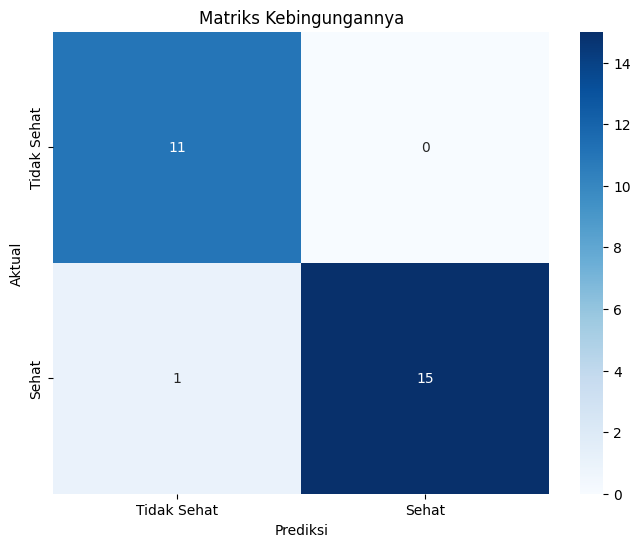


Prediksi untuk beberapa baris data uji:
     Aktual  Prediksi
98      1.0       1.0
67      0.0       0.0
105     0.0       0.0
19      1.0       1.0
42      0.0       0.0


In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan bahwa Label berada di dalam y_train
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Inisialisasi model KNN dengan K=5 (jumlah tetangga terdekat)
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data pelatihan
knn.fit(X_train, y_train)  # Melatih model dengan X_train dan y_train

# Prediksi menggunakan data pengujian
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy:.2f}")

# Menampilkan matriks kebingungannya
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriks Kebingungannya:")
print(conf_matrix)

# Visualisasi matriks kebingungannya
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Sehat', 'Sehat'], yticklabels=['Tidak Sehat', 'Sehat'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungannya')
plt.show()

# Menampilkan prediksi untuk beberapa baris data uji
print("\nPrediksi untuk beberapa baris data uji:")
print(pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred}).head())


In [ ]:
from sklearn.metrics import classification_report

# Menghitung akurasi dalam persen
accuracy_percent = accuracy * 100
print(f"Akurasi Model (dalam persen): {accuracy_percent:.2f}%")

# Menampilkan classification report
class_report = classification_report(
    y_test,
    y_pred,
    target_names=['Hidup Tidak Sehat', 'Hidup Sehat dan Sejahtera']
)
print("\nClassification Report:")
print(class_report)


Akurasi Model (dalam persen): 96.30%

Classification Report:
                           precision    recall  f1-score   support

        Hidup Tidak Sehat       0.92      1.00      0.96        11
Hidup Sehat dan Sejahtera       1.00      0.94      0.97        16

                 accuracy                           0.96        27
                macro avg       0.96      0.97      0.96        27
             weighted avg       0.97      0.96      0.96        27



In [ ]:
from google.colab import files

df = pd.DataFrame(data)
csv_file_name = "hasil_proses.csv"
df.to_csv(csv_file_name, index=False)
files.download(csv_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>